In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

From the last import `tensorflow.keras.layers` we can breakdown the imports as:

- `Conv2D`: This module represents a 2-dimensional convolutional layer in a neural network. Convolutional layers are commonly used in image classification tasks to extract features from images.

- `MaxPooling2D`: This module represents a 2-dimensional max pooling layer. Max pooling is a downsampling operation that reduces the spatial dimensions of the input, helping to extract the most important features from the data.

- `Dense`: This module represents a fully connected layer in a neural network. Dense layers are used to connect every neuron in the previous layer to every neuron in the current layer. They are commonly used in the final layers of a neural network for classification tasks.

- `Flatten`: This module is used to flatten the input data into a 1-dimensional array. It is typically used before the fully connected layers in a neural network, as they require a 1-dimensional input.

These modules are part of the `tensorflow.keras.layers` library, which is a high-level API for building neural networks using TensorFlow. TensorFlow is a popular open-source machine learning framework that provides tools and libraries for building and training deep learning models.

By importing these modules, you can use the functionalities they provide to build your own convolutional neural network (CNN) for image classification tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/CNN/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/CNN/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/CNN/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/CNN/labels_test.csv', delimiter = ',')

For data loading, we use the `numpy` library to load data from CSV files into arrays.

both `-_train` and `-_test` are saved in csv files and are comma separated

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

After loading the data, we reshape and normalize both the training and testing datasets.

The `reshape` function from NumPy is used to change the shape of the `X_train`, `Y_train`, `X_test`, and `Y_test` arrays. For the `X_train` and `X_test` arrays, they are reshaped to have four dimensions. The first dimension is the number of images (samples), the next two dimensions are the height and width of the images, and the last dimension is the number of color channels in the images. In this case, the images are 100x100 pixels in size and have 3 color channels (Red, Green, Blue), hence the shape `(len(X_train), 100, 100, 3)` and `(len(X_test), 100, 100, 3)`.

The `Y_train` and `Y_test` arrays, the labels for the images, are reshaped to have two dimensions. The first dimension is the number of labels (which should match the number of images) and the second dimension is 1, indicating that each image has a single label. Hence, the shapes `(len(Y_train), 1)` and `(len(Y_test), 1)`.

The last two lines of the code are normalizing the `X_train` and `X_test` arrays by dividing them by 255.0. This is done because the pixel values in an image range from 0 to 255, and dividing by 255 scales these values to a range of 0 to 1. This normalization step can help improve the performance of the neural network by ensuring that the input values are small and roughly the same scale.

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


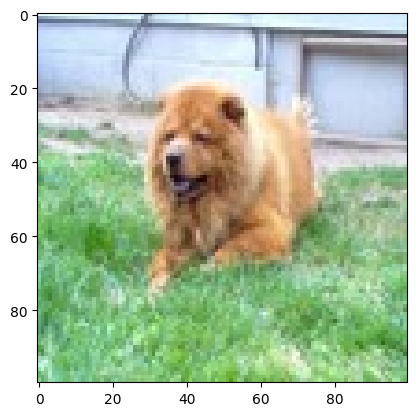

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

Above, we are defining a Convolutional Neural Network (CNN) model for image classification using the Keras Sequential API. below is a breakdown:

- `model = Sequential([])`: This line initializes a new Sequential model. Sequential is a Keras model for building neural networks where layers are stacked sequentially, one after the other.

- `Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3))`: This line adds a 2D convolutional layer to the model. The layer will have 32 filters (or kernels), each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), which outputs the input directly if it's positive, otherwise, it outputs zero. The `input_shape` parameter indicates that the input to this layer will be images of size 100x100 pixels with 3 color channels (Red, Green, Blue).

- `MaxPooling2D((2,2))`: This line adds a 2D max pooling layer to the model. Max pooling is a downsampling operation that reduces the spatial dimensions of the input, helping to extract the most important features from the data. The pool size is set to 2x2, meaning the input is divided into 2x2 pools and the maximum value from each pool is selected.

- The next `Conv2D` and `MaxPooling2D` layers are similar to the first ones, but they do not require the `input_shape` parameter because Keras can infer the shape from the output of the previous layer.

- `Flatten()`: This line adds a Flatten layer to the model, which converts the 2D output of the previous layer into a 1D array. This is necessary because the following Dense layers require 1D input.

- `Dense(64, activation = 'relu')`: This line adds a fully connected (Dense) layer to the model with 64 neurons and 'relu' activation function.

- `Dense(1, activation = 'sigmoid')`: This line adds the final Dense layer to the model with 1 neuron and 'sigmoid' activation function. The 'sigmoid' function outputs a value between 0 and 1, making it suitable for binary classification tasks.

In summary, this model is a simple CNN that takes as input 100x100 pixel images with 3 color channels, applies two sets of convolutional and max pooling layers to extract features, flattens the output, and then applies two Dense layers to perform binary classification.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # categorical_crossentropy

In [ ]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 64)

Epoch 1/50
32/32 [==============================] - 23s 680ms/step - loss: 0.7208 - accuracy: 0.4970
Epoch 2/50
32/32 [==============================] - 23s 726ms/step - loss: 0.6699 - accuracy: 0.6110
Epoch 3/50
32/32 [==============================] - 25s 773ms/step - loss: 0.5954 - accuracy: 0.6875
Epoch 4/50
32/32 [==============================] - 24s 748ms/step - loss: 0.5145 - accuracy: 0.7390
Epoch 5/50
32/32 [==============================] - 22s 692ms/step - loss: 0.4563 - accuracy: 0.7985
Epoch 6/50
32/32 [==============================] - 24s 738ms/step - loss: 0.3920 - accuracy: 0.8235
Epoch 7/50
32/32 [==============================] - 23s 728ms/step - loss: 0.3180 - accuracy: 0.8695
Epoch 8/50
32/32 [==============================] - 29s 907ms/step - loss: 0.2586 - accuracy: 0.8975
Epoch 9/50
32/32 [==============================] - 24s 747ms/step - loss: 0.1902 - accuracy: 0.9305
Epoch 10/50
32/32 [==============================] - 21s 673ms/step - loss: 0.1404 - accura

Epoch 1/20
16/16 [==============================] - 22s 1s/step - loss: 0.4099 - accuracy: 0.8120 - val_loss: 0.6502 - val_accuracy: 0.6425
Epoch 2/20
16/16 [==============================] - 27s 2s/step - loss: 0.3677 - accuracy: 0.8395 - val_loss: 0.6492 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 32s 2s/step - loss: 0.3106 - accuracy: 0.8645 - val_loss: 0.6934 - val_accuracy: 0.6550
Epoch 4/20
16/16 [==============================] - 23s 1s/step - loss: 0.2537 - accuracy: 0.8970 - val_loss: 0.7907 - val_accuracy: 0.6575
Epoch 5/20
16/16 [==============================] - 21s 1s/step - loss: 0.2247 - accuracy: 0.9130 - val_loss: 0.8362 - val_accuracy: 0.6575
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 0.1920 - accuracy: 0.9335 - val_loss: 0.8261 - val_accuracy: 0.6625
Epoch 7/20
16/16 [==============================] - 24s 2s/step - loss: 0.1386 - accuracy: 0.9510 - val_loss: 0.8770 - val_accuracy: 0.6650
Epoch 8/20
16/16 [==

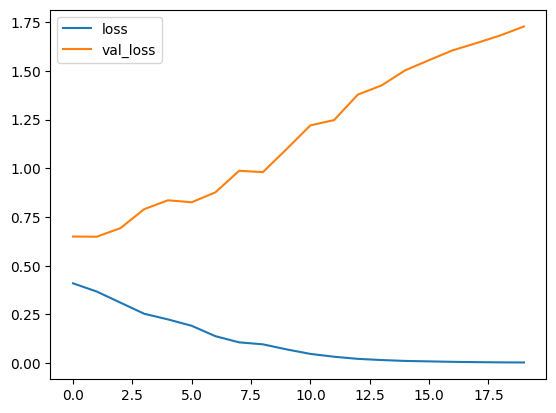

In [ ]:
from tensorflow.keras import layers, callbacks
import pandas as pd

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=2, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=128,
    epochs=20
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 75ms/step - loss: 0.6960 - accuracy: 0.6500


[0.6959625482559204, 0.6499999761581421]

# Making predictions

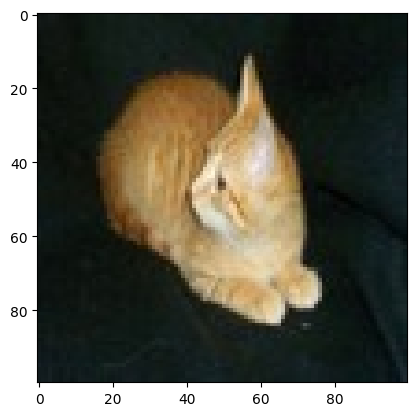

1/1 [==============================] - 0s 24ms/step
Our model says it is a : cat


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3)) # get the probability value of the class
y_pred = y_pred > 0.5 # get the class label from the probability value

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)